In [ ]:
# Sampled stories (replace these lists with the sampled ones from your dataset)
import pandas as pd
dataset = pd.read_csv("hippoCorpusV2.csv")

# Sample 100 stories for each type
sample_recalled = dataset[dataset['memType'] == 'recalled'].sample(3500)['story'].tolist()
sample_retold = dataset[dataset['memType'] == 'retold'].sample(3500)['story'].tolist()
sample_imagined = dataset[dataset['memType'] == 'imagined'].sample(3500)['story'].tolist()
len(sample_recalled), len(sample_retold), len(sample_imagined)

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def extract_linearity(story, topic, model, tokenizer, history_length):
    """
    Extracts linearity measure for a given story.

    
    Parameters:
    - story (str): The story text.
    - topic (str): The topic of the story.
    - model (GPT2LMHeadModel): The pretrained GPT2 model.
    - tokenizer (GPT2Tokenizer): The tokenizer for the model.
    - history_length (int): Number of preceding sentences to consider as history.
    
    Returns:
    - float: The computed sequentiality for the story.
    """
    
    # Tokenize the story and topic
    story_tokens = tokenizer.tokenize(story)
    topic_tokens = tokenizer.tokenize(topic)
    
    # Split the story into sentences
    sentences = story.split('.')
    
    # Initialize lists to store probabilities
    topic_probs = []
    context_probs = []
    
    for i, sentence in enumerate(sentences):
        # Tokenize the current sentence
        sentence_tokens = tokenizer.tokenize(sentence)
        
        # For the topic-driven model, compute the probability of the sentence given only the topic
        input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(topic_tokens + sentence_tokens)).unsqueeze(0)
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
        loss_topic = outputs[0].item()
        topic_probs.append(loss_topic)
        
        # For the contextual model, compute the probability of the sentence given the topic and the history
        context = '. '.join(sentences[max(0, i-history_length):i])
        context_tokens = tokenizer.tokenize(context)
        input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(topic_tokens + context_tokens + sentence_tokens)).unsqueeze(0)
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
        loss_context = outputs[0].item()
        context_probs.append(loss_context)
    
    # Compute sequentiality for each sentence
    sequentialities = [(p_topic - p_context) for p_topic, p_context in zip(topic_probs, context_probs)]
    print(sequentialities)
    
    # Return the average sequentiality for the story
    return sum(sequentialities) / len(sequentialities)


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def extract_linearity(story, topic, model, tokenizer, history_length):
    """
    Extracts linearity measure for a given story.

    
    Parameters:
    - story (str): The story text.
    - topic (str): The topic of the story.
    - model (GPT2LMHeadModel): The pretrained GPT2 model.
    - tokenizer (GPT2Tokenizer): The tokenizer for the model.
    - history_length (int): Number of preceding sentences to consider as history.
    
    Returns:
    - float: The computed sequentiality for the story.
    """
    
    # Tokenize the story and topic
    story_tokens = tokenizer.tokenize(story)
    topic_tokens = tokenizer.tokenize(topic)
    
    # Split the story into sentences
    sentences = story.split('.')
    
    # Initialize lists to store probabilities
    topic_probs = []
    context_probs = []
    
    for i, sentence in enumerate(sentences):
        # Tokenize the current sentence
        sentence_tokens = tokenizer.tokenize(sentence)
        
        # For the topic-driven model, compute the probability of the sentence given only the topic
        input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(topic_tokens + sentence_tokens)).unsqueeze(0)
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
        loss_topic = outputs[0].item()
        topic_probs.append(loss_topic)
        
        # For the contextual model, compute the probability of the sentence given the topic and the history
        context = '. '.join(sentences[max(0, i-history_length):i])
        context_tokens = tokenizer.tokenize(context)
        input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(topic_tokens + context_tokens + sentence_tokens)).unsqueeze(0)
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
        loss_context = outputs[0].item()
        context_probs.append(loss_context)
    
    # Compute sequentiality for each sentence
    sequentialities = [(p_topic - p_context) for p_topic, p_context in zip(topic_probs, context_probs)]
    print(sequentialities)
    
    # Return the average sequentiality for the story
    return sum(sequentialities) / len(sequentialities)


In [2]:
!pip install matplotlib

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\shash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


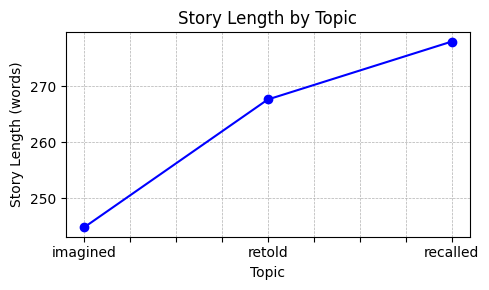

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe with the sampled data
df = pd.read_csv("hippoCorpusV2.csv")

# Compute average story length by topic
df['story_length'] = df['story'].str.split().str.len()  # Get the word count for each story
avg_lengths = df.groupby('memType')['story_length'].mean()

# Plotting
order = ['imagined', 'retold', 'recalled']
avg_lengths = avg_lengths.reindex(order)

# Plotting
plt.figure(figsize=(5,3))
avg_lengths.plot(kind='line', marker='o', color='b')
plt.title('Story Length by Topic')
plt.ylabel('Story Length (words)')
plt.xlabel('Topic')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


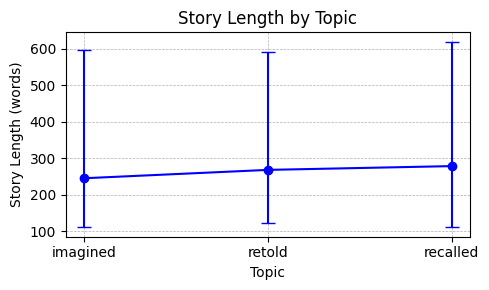

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe with the sampled data
df = pd.read_csv("hippoCorpusV2.csv")

# Compute average, min, and max story lengths by topic
df['story_length'] = df['story'].str.split().str.len()  # Get the word count for each story
avg_lengths = df.groupby('memType')['story_length'].mean()
min_lengths = df.groupby('memType')['story_length'].min()
max_lengths = df.groupby('memType')['story_length'].max()

# Ordering
order = ['imagined', 'retold', 'recalled']
avg_lengths = avg_lengths.reindex(order)
min_lengths = min_lengths.reindex(order)
max_lengths = max_lengths.reindex(order)

# Calculate the error values (difference between average and min/max)
lower_error = avg_lengths - min_lengths
upper_error = max_lengths - avg_lengths
errors = [lower_error, upper_error]

# Plotting
plt.figure(figsize=(5,3))

# Use errorbar to plot the average lengths with the min/max ranges
plt.errorbar(order, avg_lengths, yerr=errors, fmt='o-', color='b', capsize=5)

plt.title('Story Length by Topic')
plt.ylabel('Story Length (words)')
plt.xlabel('Topic')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


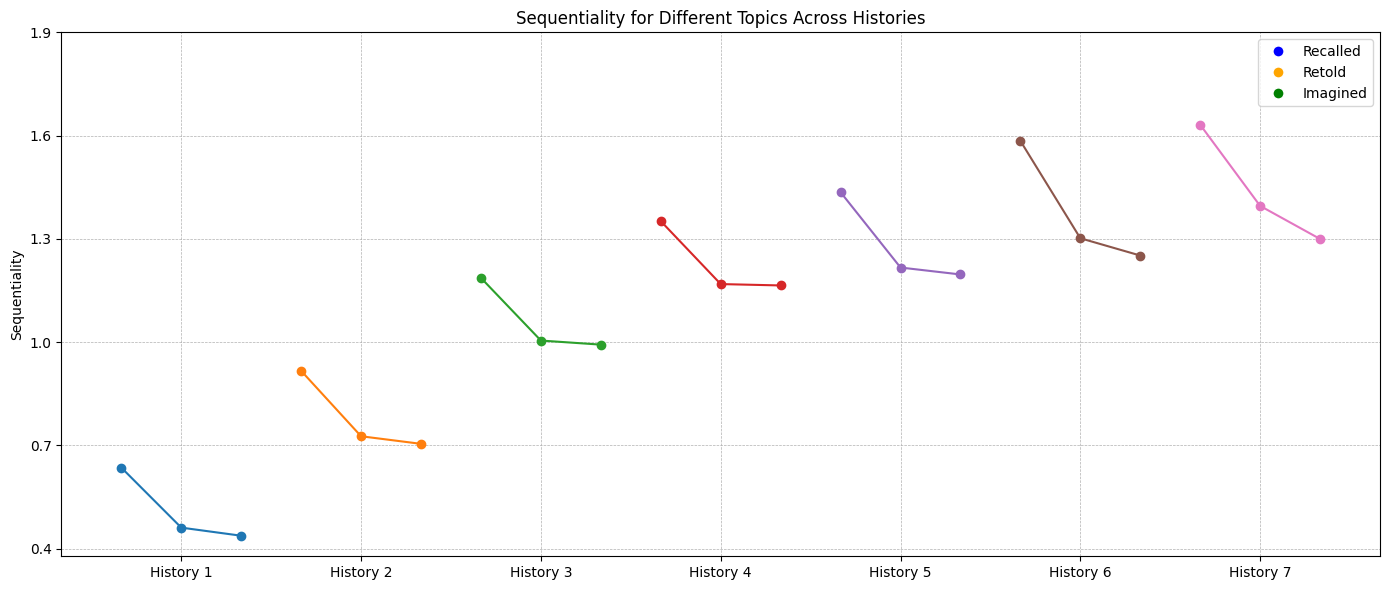

<Figure size 640x480 with 0 Axes>

In [4]:
# Given sequentiality values for each topic and history
recalled = [0.6350696275074647, 0.9163931521543102, 1.1864047800327742, 1.3514069041091292, 1.435451871537, 1.58462346120, 1.63146841568463]
retold = [0.46075407100711, 0.7262603164153402, 1.0043967050513005, 1.1684872118586036, 1.21654976532, 1.301654356813, 1.3956265346835]
imagined = [0.4372139932996382, 0.7042215169494618, 0.9924968820657993, 1.1644770522249577, 1.19641454761156, 1.25141684105, 1.29954648631]

# Plotting the sequentiality values for each topic
# Adjusting the graph to represent each history individually
histories = list(range(1, 8))
plt.figure(figsize=(14, 6))

# Plotting the sequentiality values for each topic at individual history values
for idx, h in enumerate(histories, 1):
    plt.plot([3*idx-2, 3*idx-1, 3*idx], [recalled[h-1], retold[h-1], imagined[h-1]], marker='o', label=f'History {h}')

# Adjusting x-ticks for clear representation of each history and topic
xticks_positions = [3*idx-1 for idx in range(1, len(histories)+1)]
xticks_labels = [f'History {h}' for h in histories]
plt.xticks(xticks_positions, xticks_labels)

plt.yticks([0.4, 0.7, 1.0, 1.3, 1.6, 1.9], ['0.4', '0.7', '1.0', '1.3', '1.6', '1.9'])
plt.ylabel('Sequentiality')
plt.title('Sequentiality for Different Topics Across Histories')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding custom legend for Topics
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Recalled', markersize=8, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Retold', markersize=8, markerfacecolor='orange'),
                   Line2D([0], [0], marker='o', color='w', label='Imagined', markersize=8, markerfacecolor='green')]
plt.legend(handles=legend_elements, loc="upper right")

plt.tight_layout()
plt.show()

plt.savefig("fig2a.png")


memType
imagined    0.407018
recalled    0.433109
retold      0.417273
Name: realis_prop, dtype: float64


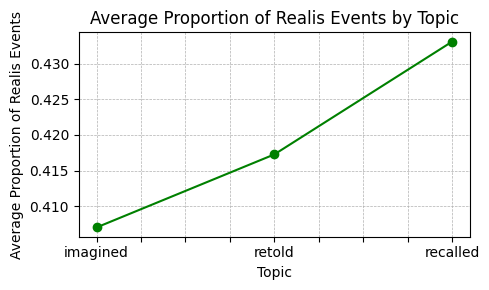

In [9]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe with the sampled data
df = pd.read_csv("hcV3-stories.csv")

# Function to compute the proportion of realis events in a story
def realis_proportion(story):
    blob = TextBlob(story)
    total_verbs = sum(1 for word, pos in blob.tags if "VB" in pos)
    past_tense_verbs = sum(1 for word, pos in blob.tags if pos == "VBD")
    
    if total_verbs == 0:  # To prevent division by zero
        return 0
    return past_tense_verbs / total_verbs

# Apply the function to each story
df["realis_prop"] = df["story"].apply(realis_proportion)

# Compute the average proportion of realis events by topic
avg_realis_prop = (df.groupby("memType")["realis_prop"].mean())

# Print the computed average proportions
print(avg_realis_prop)

# Reorder the avg_realis_prop based on the desired order
order = ["imagined", "retold", "recalled"]
avg_realis_prop = avg_realis_prop.reindex(order)

# Plotting without setting y-axis limits
plt.figure(figsize=(5,3))
avg_realis_prop.plot(kind="line", marker="o", color="g")
plt.title("Average Proportion of Realis Events by Topic")
plt.ylabel("Average Proportion of Realis Events")
plt.xlabel("Topic")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


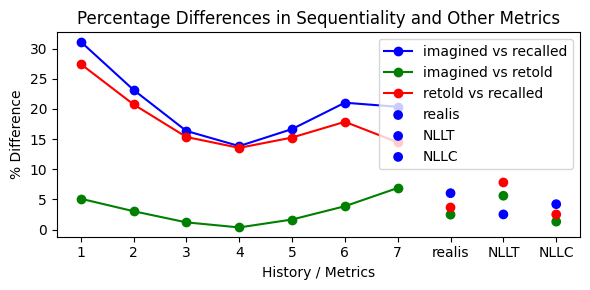

In [14]:
# Given values
seq_values = {
    'recalled': [0.6350696275074647, 0.9163931521543102, 1.1864047800327742, 1.3514069041091292, 1.435451871537,1.58462346120,1.63146841568463],
    'retold': [0.46075407100711, 0.7262603164153402, 1.0043967050513005, 1.1684872118586036,1.21654976532,1.301654356813,1.3956265346835],
    'imagined': [0.4372139932996382, 0.7042215169494618, 0.9924968820657993, 1.1644770522249577,1.19641454761156,1.25141684105,1.29954648631]
}

realis_proportions = {
    'imagined': 0.407018,
    'recalled': 0.433109,
    'retold': 0.417273
}

pairs = [
    ('imagined', 'recalled'),
    ('imagined', 'retold'),
    ('retold', 'recalled')
]

# Calculating the % difference for each pair for sequentiality across histories
seq_diffs = {}
for pair in pairs:
    topic_1, topic_2 = pair
    diffs = {}
    for hist in range(1, 8):
        diff = ((seq_values[topic_1][hist - 1] - seq_values[topic_2][hist - 1]) / seq_values[topic_2][hist - 1]) * 100
        diffs[hist] = abs(diff)  # Taking the absolute value to ensure positivity
    seq_diffs[pair] = diffs

# Calculate the percentage difference for realis values
realis_diff_values = []
for pair in pairs:
    topic_1, topic_2 = pair
    diff = ((realis_proportions[topic_1] - realis_proportions[topic_2]) / realis_proportions[topic_2]) * 100
    realis_diff_values.append(abs(diff))  # Taking the absolute value to ensure positivity

# Plotting the graph
fig, ax = plt.subplots(figsize=(6, 3))

# Plotting the percentage differences for each history value
for pair, color in zip(pairs, ['blue', 'green', 'red']):
    diff_values = [seq_diffs[pair][hist] for hist in histories]
    ax.plot(histories, diff_values, '-o', label=f'{pair[0]} vs {pair[1]}', color=color)

# Plotting the realis, NLLT, and NLLC values
special_points = ['realis', 'NLLT', 'NLLC']
special_values = [realis_diff_values, [2.5, 5.6, 7.8], [4.2, 1.3, 2.5]]

for idx, (point_label, values) in enumerate(zip(special_points, special_values)):
    x_vals = [7 + 1 + idx] * 3  # Positioning the points after the history values
    ax.scatter(x_vals, values, label=point_label, color=['blue', 'green', 'red'])

# Setting labels and title
ax.set_xticks(list(range(1, 11)))
ax.set_xticklabels(histories + special_points)
ax.set_xlabel('History / Metrics')
ax.set_ylabel('% Difference')
ax.set_title('Percentage Differences in Sequentiality and Other Metrics')
ax.legend()

plt.tight_layout()
plt.show()


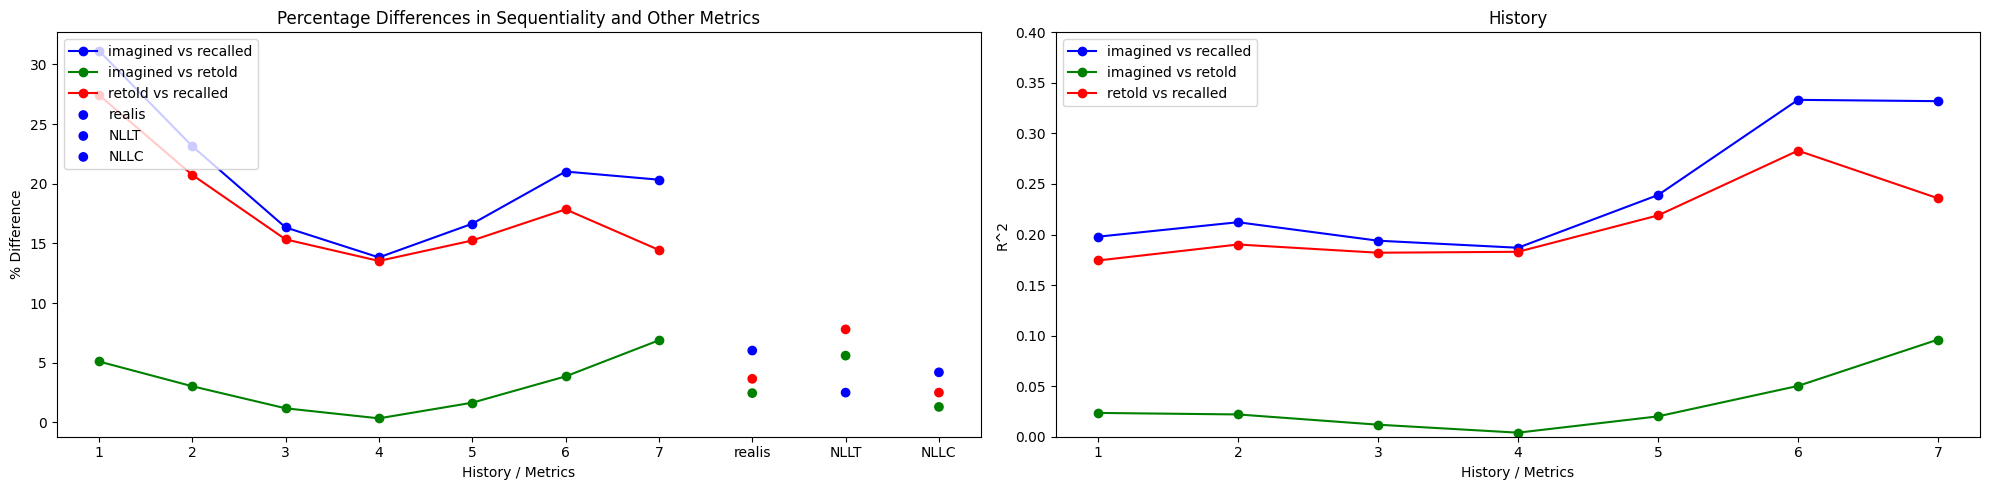

In [15]:
import matplotlib.pyplot as plt
seq_values = {
    'recalled': [0.6350696275074647, 0.9163931521543102, 1.1864047800327742, 1.3514069041091292, 1.435451871537,1.58462346120,1.63146841568463],
    'retold': [0.46075407100711, 0.7262603164153402, 1.0043967050513005, 1.1684872118586036,1.21654976532,1.301654356813,1.3956265346835],
    'imagined': [0.4372139932996382, 0.7042215169494618, 0.9924968820657993, 1.1644770522249577,1.19641454761156,1.25141684105,1.29954648631]
}

realis_proportions = {
    'imagined': 0.407018,
    'recalled': 0.433109,
    'retold': 0.417273
}

pairs = [
    ('imagined', 'recalled'),
    ('imagined', 'retold'),
    ('retold', 'recalled')
]

def calculate_seq_diffs(seq_values, pairs, percentage=True):
    histories = list(range(1, 8))
    seq_diffs = {}
    for pair in pairs:
        topic_1, topic_2 = pair
        diffs = {}
        for hist in histories:
            if percentage:
                diff = ((seq_values[topic_1][hist - 1] - seq_values[topic_2][hist - 1]) / seq_values[topic_2][hist - 1]) * 100
            else:
                diff = abs(seq_values[topic_1][hist - 1] - seq_values[topic_2][hist - 1])  # Absolute difference
            diffs[hist] = abs(diff) if percentage else diff
        seq_diffs[pair] = diffs
    return seq_diffs

seq_diffs_percent = calculate_seq_diffs(seq_values, pairs, percentage=True)
seq_diffs_absolute = calculate_seq_diffs(seq_values, pairs, percentage=False)

# Plotting the graphs side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

colors = ['blue', 'green', 'red']
histories = list(range(1, 8))
special_points = ['realis', 'NLLT', 'NLLC']

# Graph 1: Percentage Differences
for pair, color in zip(pairs, colors):
    diff_values = [seq_diffs_percent[pair][hist] for hist in histories]
    ax1.plot(histories, diff_values, '-o', label=f'{pair[0]} vs {pair[1]}', color=color)

for idx, (point_label, values) in enumerate(zip(special_points, special_values)):
    x_vals = [7 + 1 + idx] * 3
    ax1.scatter(x_vals, values, label=point_label, color=colors)

ax1.set_xticks(list(range(1, 11)))
ax1.set_xticklabels(histories + special_points)
ax1.set_xlabel('History / Metrics')
ax1.set_ylabel('% Difference')
ax1.set_title('Percentage Differences in Sequentiality and Other Metrics')
ax1.legend(loc='upper left')

# Graph 2: Absolute Differences
for pair, color in zip(pairs, colors):
    diff_values = [seq_diffs_absolute[pair][hist] for hist in histories]
    ax2.plot(histories, diff_values, '-o', label=f'{pair[0]} vs {pair[1]}', color=color)



ax2.set_xticks(list(range(1,8 )))
ax2.set_xticklabels(histories)
ax2.set_xlabel('History / Metrics')
ax2.set_ylabel('R^2')
ax2.set_title('History')
ax2.legend(loc='upper left')
ax2.set_ylim(0.0, 0.4)
plt.tight_layout()
plt.show()